In [3]:
import pandas as pd
import numpy as np

# Path to the .txt file
file_path = 'D:/week3 data/MachineLearningRating_v3.txt'

# Load the data into a DataFrame with pipe delimiter
df = pd.read_csv(file_path, delimiter='|')

# Display the first few rows of the DataFrame
print("Data Preview:\n", df.head())

# Display the data types of each column
data_types = df.dtypes
print("Data Types:\n", data_types)

C:\Users\Robel\AppData\Local\Temp\ipykernel_9376\2830270550.py:8: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='|')


Data Preview:
    UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...         

In [10]:
# Ensure relevant columns are numeric
numeric_cols = ['TotalPremium', 'TotalClaims']  # Correct column names based on actual names

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values (fill with mean or drop)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Calculate descriptive statistics for numerical features
descriptive_stats = df[numeric_cols].describe()
print("Descriptive Statistics:\n", descriptive_stats)

# Calculate variance for numerical features
variance = df[numeric_cols].var()
print("Variance:\n", variance)

# Calculate standard deviation for numerical features
std_dev = df[numeric_cols].std()
print("Standard Deviation:\n", std_dev)

Descriptive Statistics:
        TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05
Variance:
 TotalPremium    5.303096e+04
TotalClaims     5.683812e+06
dtype: float64
Standard Deviation:
 TotalPremium     230.284513
TotalClaims     2384.074695
dtype: float64


In [5]:

# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print("Missing Values:\n", missing_values)

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Display missing values with percentage
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Summary of Missing Values:\n", missing_summary)


Missing Values:
 UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoo

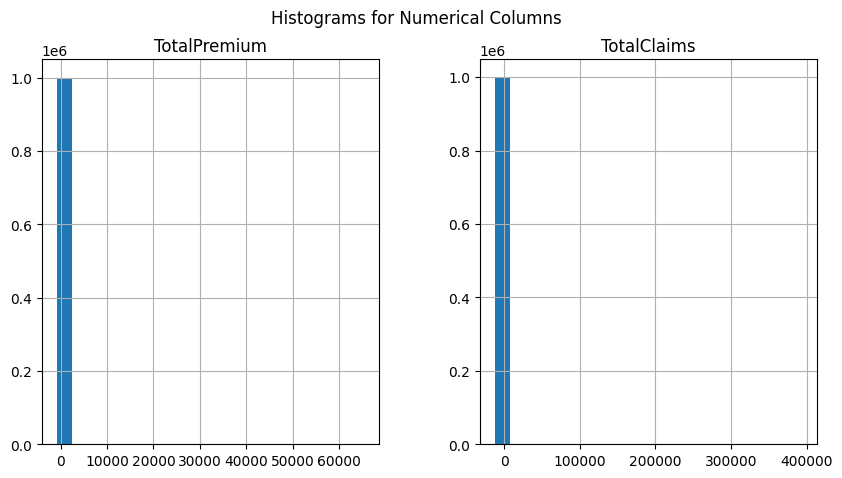

In [6]:
#import pandas as pd
import matplotlib.pyplot as plt

# Path to the .txt file
#file_path = 'D:/week3 data/MachineLearningRating_v3.txt'

# Load the data into a DataFrame with pipe delimiter
#df = pd.read_csv(file_path, delimiter='|')

# Ensure relevant columns are numeric
numeric_cols = ['TotalPremium', 'TotalClaims']  # Use the correct column names based on your data

# Plot histograms for numerical columns
df[numeric_cols].hist(bins=20, figsize=(10, 5))
plt.suptitle('Histograms for Numerical Columns')
plt.show()


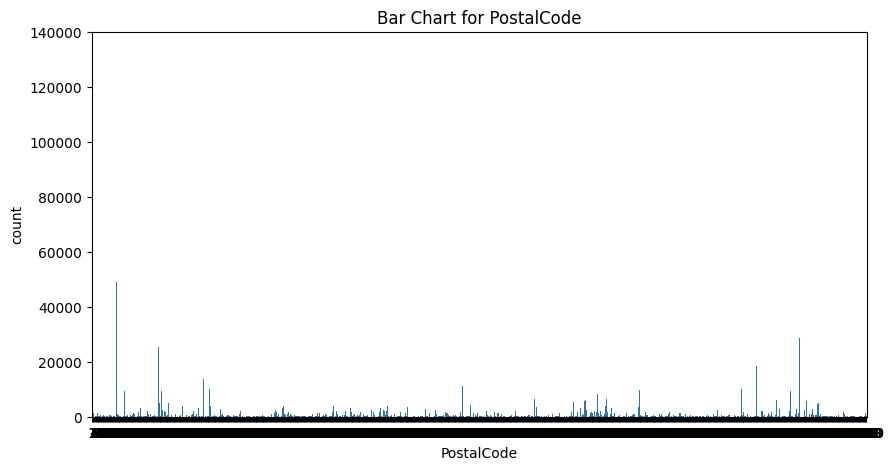

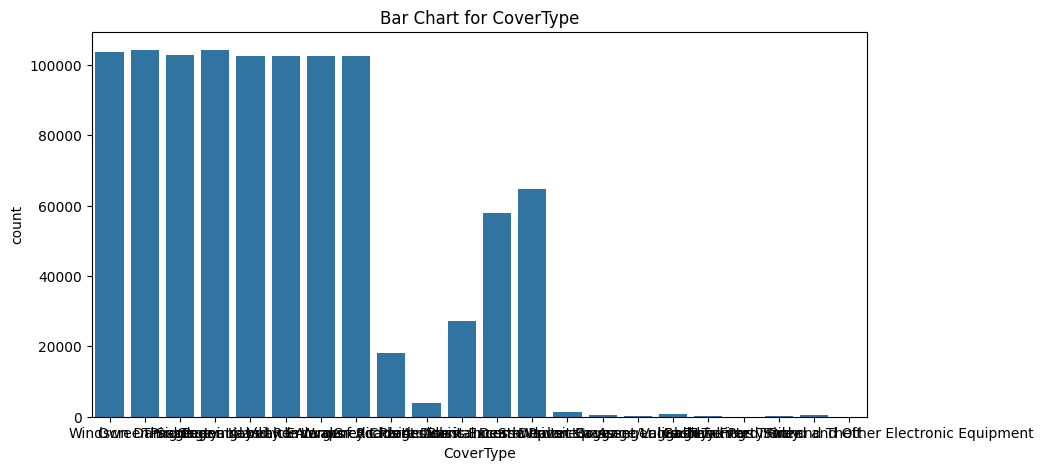

In [7]:
import seaborn as sns

# Define categorical columns
categorical_cols = ['PostalCode', 'CoverType']  # Use the correct column names based on your data

# Plot bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Bar Chart for {col}')
    plt.show()
